# Evaluation Exercises
- Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. 
- By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

In [2]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**1. Load the tips dataset from either pydataset or seaborn.**

In [3]:
#import data from pydatset
from pydataset import data
tips = data('tips')

In [5]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


**2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.**

In [19]:
# Make Predictions
model = LinearRegression().fit(df[['total_bill']], df.tip)
df['yhat'] = model.predict(df[['total_bill']])

In [20]:
# y = tip as making predictions oft
df['yhat_baseline'] = df.tip.mean()

In [21]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_bill     244 non-null    float64
 1   tip            244 non-null    float64
 2   sex            244 non-null    object 
 3   smoker         244 non-null    object 
 4   day            244 non-null    object 
 5   time           244 non-null    object 
 6   size           244 non-null    int64  
 7   yhat           244 non-null    float64
 8   yhat_baseline  244 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 19.1+ KB


**3. Plot the residuals for the linear regression model that you made.**

In [23]:
# calculate evaluation metrics: residuals
df['residuals'] = df.tip - df.yhat

In [24]:
# calculate evaluation metrics: baseline residuals:
df['baseline_residuals'] = df.tip - df.yhat_baseline

In [25]:
# check to ensure the added columns are there:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residuals,baseline_residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


<AxesSubplot:ylabel='Frequency'>

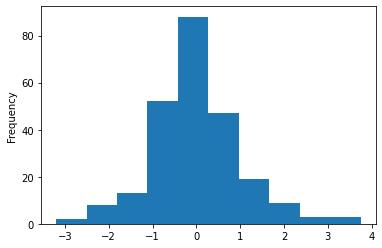

In [30]:
# plot of residuals
df.residuals.plot.hist()

<AxesSubplot:ylabel='Frequency'>

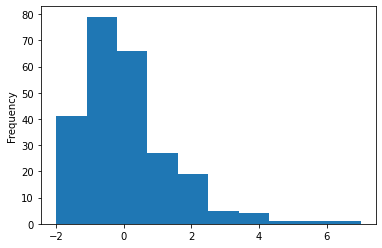

In [31]:
# plot of baseline residuals
df.baseline_residuals.plot.hist()

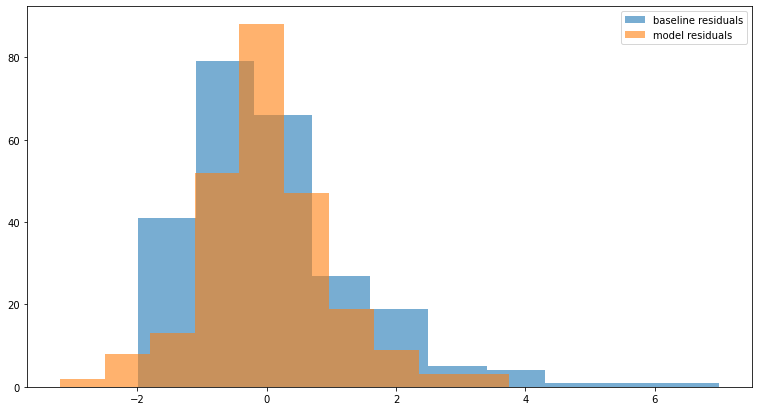

In [58]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(df.baseline_residuals, label='baseline residuals', alpha=.6)
ax.hist(df.residuals, label='model residuals', alpha=.6)
ax.legend()

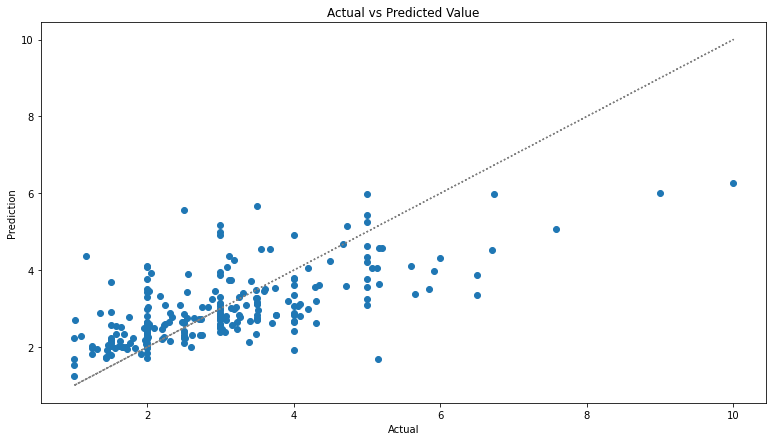

In [76]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(df.tip, df.yhat, label='predicted')
ax.set(title='Actual vs Predicted Value', ylabel='Prediction', xlabel='Actual')
ax.plot(df.tip, df.tip, ls=':', c='gray')

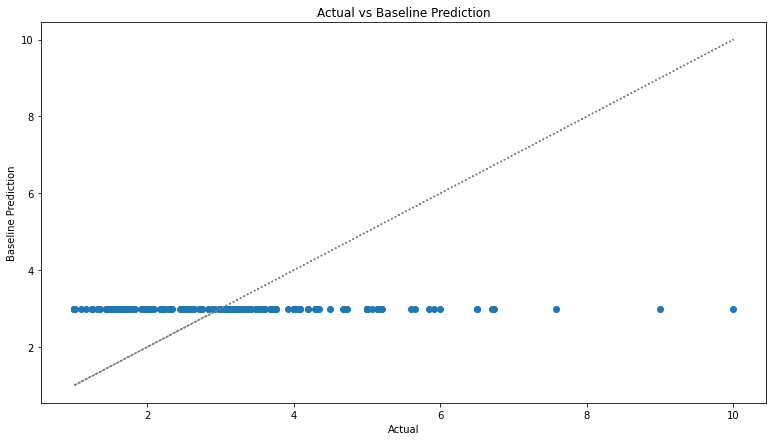

In [78]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(df.tip, df.yhat_baseline, label='baseline prediction')
ax.set(title='Actual vs Baseline Prediction', ylabel='Baseline Prediction', xlabel='Actual')
ax.plot(df.tip, df.tip, ls=':', c='gray')

**4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.**

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residuals,baseline_residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


**calculate sum of squared error**

In [49]:
# sse = sum of squared error
sse = (df.residuals ** 2).sum()
print(f'Model sse: {sse}')

Model sse: 252.788743850776


**calculate explained sum of squares**

In [48]:
# ess = explained sum of squares
ess = ((df.yhat_baseline - df.tip.mean())**2).sum()
print(f'Model ess: {ess}')

Model ess: 0.0


**calculate total sum of squares**

In [47]:
# tss = total sum of squares
tss = ((df.tip - df.tip.mean())**2).sum()
print(f'Model tss: {tss}')

Model tss: 465.2124770491804


**calculate mean squared error**

In [36]:
n = df.shape[0]

In [50]:
# mse = mean squared errors
mse = sse / n
print(f'Model mse: {mse}')

Model mse: 1.036019442011377


In [60]:
# easy way for mse:
mean_squared_error(df.tip, df.yhat)

1.036019442011377

**calculate root mean squared error**

In [53]:
# rmse = root mean squared error
rmse = math.sqrt(mse)
print(f'Model rmse: {rmse}')

Model rmse: 1.0178504025697377


**All models:**

In [56]:
print(f'Model sse: {sse}')
print(f'Model ess: {ess}')
print(f'Model tss: {tss}')
print(f'Model mse: {mse}')
print(f'Model rmse: {rmse}')

Model sse: 252.788743850776
Model ess: 0.0
Model tss: 465.2124770491804
Model mse: 1.036019442011377
Model rmse: 1.0178504025697377


**5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).**

In [67]:
# comparing model to the baseline: 
sse_baseline = (df.baseline_residuals ** 2).sum()
mse_baseline = sse_baseline / n
rmse_baseline = math.sqrt(mse_baseline)

print(f'Model scores: sse: {sse} mse: {mse} rmse: {rmse}')
print(f'Baseline scores: sse: {sse_baseline} mse: {mse_baseline} rmse: {rmse_baseline}')

Model scores: sse: 252.788743850776 mse: 1.036019442011377 rmse: 1.0178504025697377
Baseline scores: sse: 465.2124770491804 mse: 1.906608512496641 rmse: 1.3807999538298954


**6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.**

In [69]:
if sse < sse_baseline:
    print(f'The model sse out performs the baseline sse by {sse_baseline - sse} units')
else:
    print(f'The model see under performs the baseline see by {sse - sse_baseline} units')

The model sse out performs the baseline sse by 212.4237331984044 units


**7. Question What is the amount of variance explained in your model?**

In [71]:
R_squared = ess/tss
print(f'The variance explained in my model is {R_squared}')

The variance explained in my model is 0.0


**8: Is your model better than the baseline model?**

In [74]:
# Calculating ESS & TSS for baseline
ess_b = ((df.yhat_baseline - df.tip.mean())**2).sum()
tss_b = ((df.tip - df.tip.mean())**2).sum()

print(f'The baseline ess: {ess_b} and the baseline tss: {tss_b}')

The baseline ess: 0.0 and the baseline tss: 465.2124770491804


**9. Create a file named evaluate.py that contains the following functions**
- refer to evaluate.py file

**10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.**

In [82]:
#import data from pydatset
from pydataset import data
mpg = data('mpg')
df_mpg = pd.DataFrame(mpg)
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [83]:
model = LinearRegression().fit(mpg[['displ']], mpg.hwy)

In [84]:
actual = mpg.hwy # y
predicted = model.predict(mpg[['displ']]) # yhat

In [87]:
import evaluate
evaluate.regression_errors(actual, predicted)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
r2         0.586787
dtype: float64

In [88]:
evaluate.better_than_baseline(actual, predicted)

True

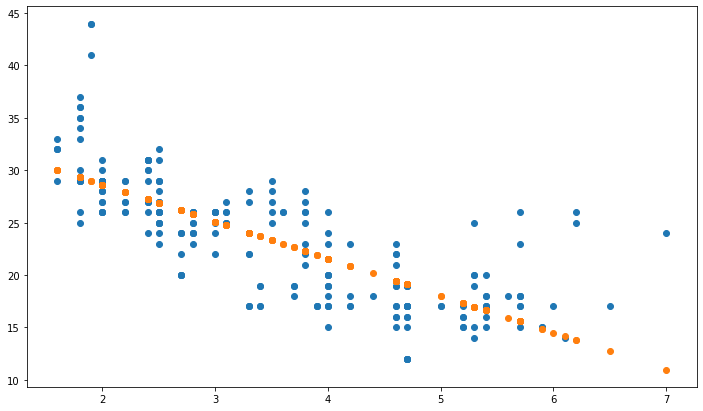

In [89]:
evaluate.fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(mpg.displ, mpg.hwy, label='actual')
ax.scatter(mpg.displ, predicted, label='prediction')

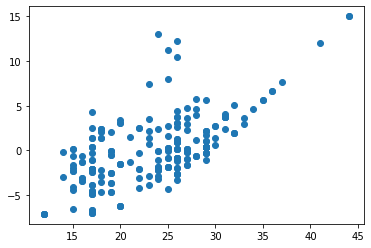

In [90]:
# Sidenote: visualizing residuals w/ multiple independent variables
plt.scatter(mpg.hwy, actual - predicted)

(array([15., 12., 18., 44., 48., 33., 29., 17.,  6.,  3.,  2.,  1.,  2.,
         2.,  2.]),
 array([-7.10388366, -5.62959357, -4.15530348, -2.68101339, -1.2067233 ,
         0.26756678,  1.74185687,  3.21614696,  4.69043705,  6.16472714,
         7.63901723,  9.11330732, 10.58759741, 12.0618875 , 13.53617759,
        15.01046768]),
 <BarContainer object of 15 artists>)

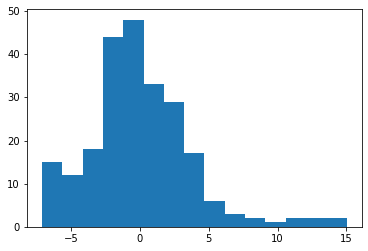

In [91]:
plt.hist(actual - predicted, bins=15)